In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Data Setup
# Manually populated from your text and image data
solvers_data = {
    "DFS": {
        "win_rate": 0.837,
        "avg_time": 0.187,
        "total_time": 432.10,
        "distribution": {4: 530, 2: 21, 3: 185, 5: 676, 6: 521, 7: 238, 8: 99, 9: 23, 12: 2, 10: 9, 11: 4, 13: 1}
    },
    "KB Hill Climbing": {
        "win_rate": 0.903,
        "avg_time": 0.203,
        "total_time": 468.81,
        "distribution": {5: 794, 3: 212, 4: 679, 7: 140, 6: 383, 2: 18, 8: 49, 12: 2, 9: 23, 10: 6, 11: 3}
    },
    "Entropy": {
        "win_rate": 0.9995,
        "avg_time": 13.857,
        "total_time": 31996.63,
        "distribution": {4: 1279, 3: 382, 5: 572, 6: 62, 2: 13, 7: 1}
    },
    "Progressive Entropy": {
        "win_rate": 0.964,
        "avg_time": 0.318,
        "total_time": 733.31,
        "distribution": {3: 499, 4: 1003, 5: 512, 6: 171, 2: 41, 7: 53, 8: 21, 10: 4, 9: 4, 12: 1}
    }
}

In [10]:

# 2. Determine Global Scales (for unified axis)
all_keys = []
all_values = []
for s in solvers_data:
    all_keys.extend(solvers_data[s]['distribution'].keys())
    all_values.extend(solvers_data[s]['distribution'].values())

min_attempt = min([int(k) for k in all_keys])
max_attempt = max([int(k) for k in all_keys])
max_frequency = max(all_values)

# X range covers all possible attempts found across all solvers
x_range = range(min_attempt, max_attempt + 1)
# Y limit is set to the max frequency found + 10% padding
y_limit = max_frequency * 1.1

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'] # Distinct colors for each solver

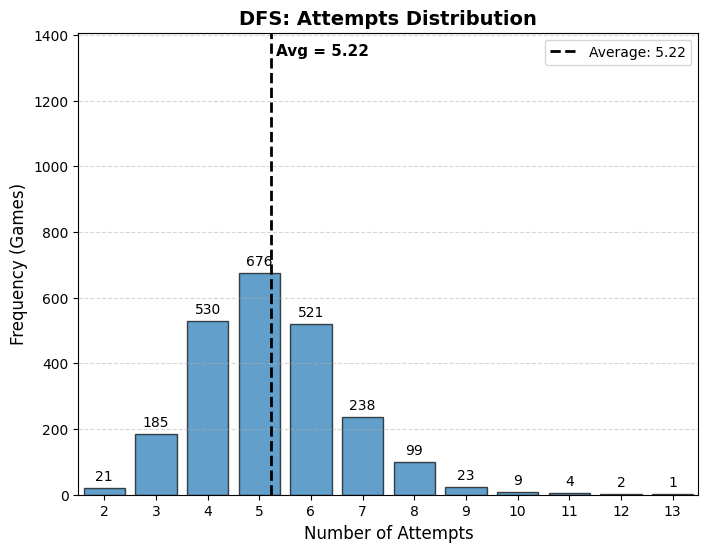

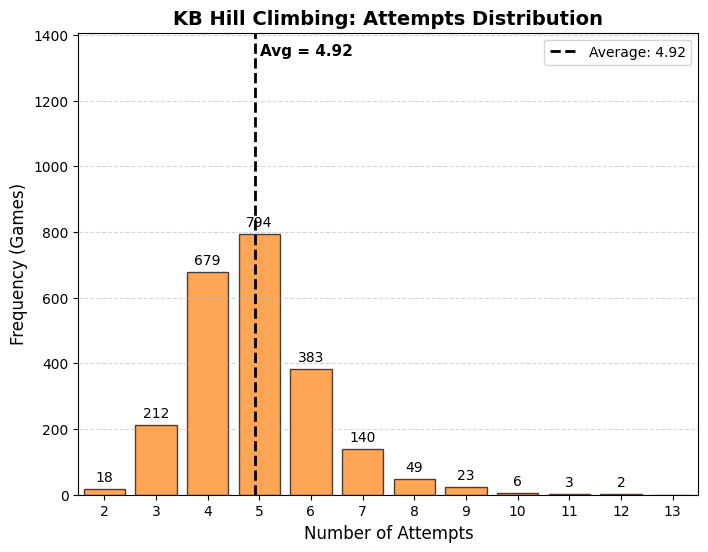

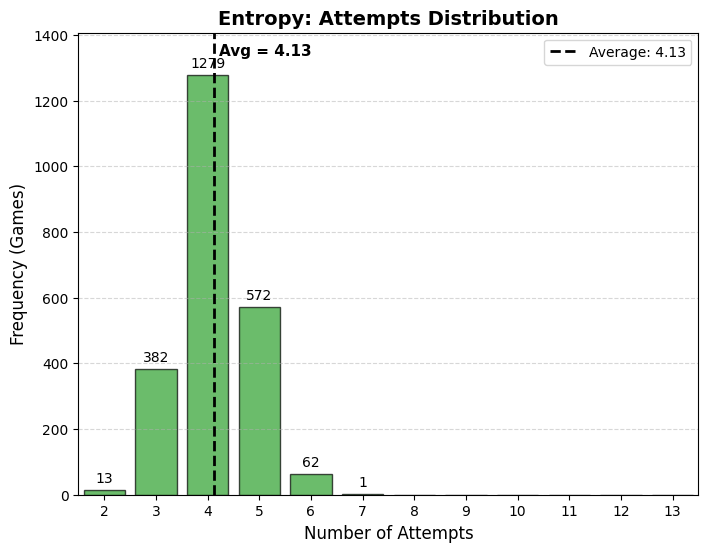

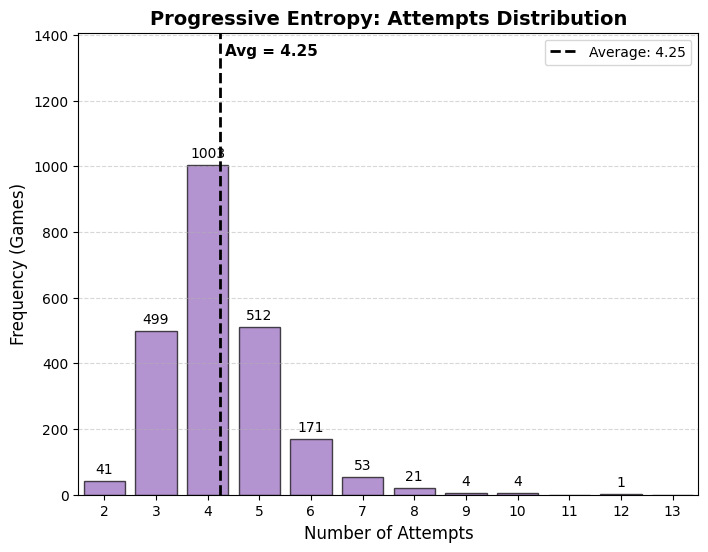

In [11]:

# 3. Generate and Save 4 Separate Distribution Charts
for i, (solver_name, data) in enumerate(solvers_data.items()):
    plt.figure(figsize=(8, 6))
    dist = data['distribution']
    
    # Prepare data, fill missing keys (attempts) with 0
    counts = [dist.get(k, 0) for k in x_range]
    
    # Compute average attempts from distribution
    total_games = sum(counts)
    if total_games > 0:
        avg_attempts = sum(k * counts[idx] for idx, k in enumerate(x_range)) / total_games
    else:
        avg_attempts = 0
    
    # Create Bar Chart
    bars = plt.bar(x_range, counts, color=colors[i], alpha=0.7, edgecolor='black')
    
    # Draw vertical line for average attempts
    if total_games > 0:
        plt.axvline(avg_attempts, color='k', linestyle='--', linewidth=2, label=f'Average: {avg_attempts:.2f}')
        # annotate average value near top of chart
        plt.text(avg_attempts + 0.1, y_limit * 0.95, f'Avg = {avg_attempts:.2f}', color='k', fontsize=11, fontweight='bold')
    
    # Styling
    plt.title(f'{solver_name}: Attempts Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Attempts', fontsize=12)
    plt.ylabel('Frequency (Games)', fontsize=12)
    plt.xticks(x_range)
    
    # Apply Unified Scales
    plt.ylim(0, y_limit)
    plt.xlim(min_attempt - 0.5, max_attempt + 0.5)
    
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + (y_limit*0.01),
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=10)
    
    # Add legend for average line if present
    if total_games > 0:
        plt.legend()
    
    # Save file
    filename = f"{solver_name.replace(' ', '_').lower()}_dist.png"
    plt.savefig(filename)
    plt.show() # Display in notebook

C:\Users\Admin\AppData\Local\Temp\ipykernel_22348\3429255815.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  time_plot = sns.barplot(data=time_df, x="Solver", y="Total Time (s)", palette="viridis")


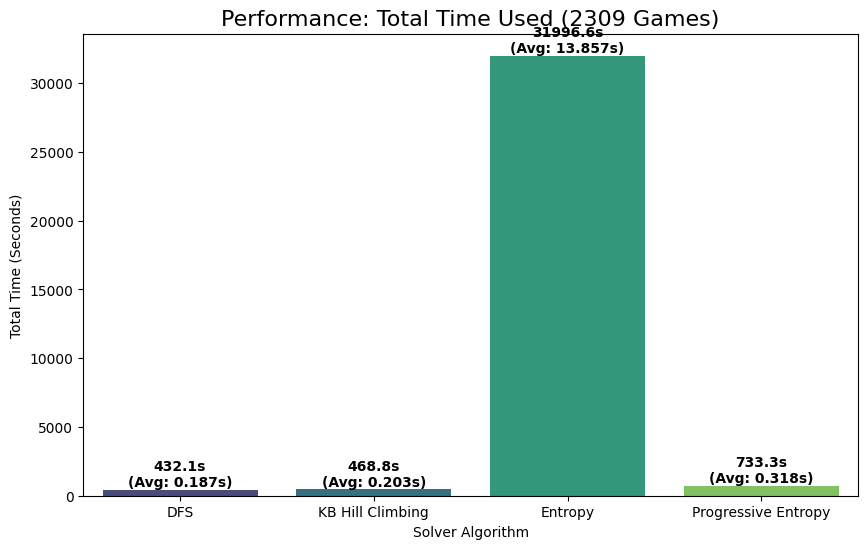

In [12]:




# 4. Generate and Save Time Comparison Chart
time_df = pd.DataFrame([
    {"Solver": name, "Total Time (s)": data["total_time"], "Avg Time (s)": data["avg_time"]}
    for name, data in solvers_data.items()
])

plt.figure(figsize=(10, 6))
time_plot = sns.barplot(data=time_df, x="Solver", y="Total Time (s)", palette="viridis")

plt.title('Performance: Total Time Used (2309 Games)', fontsize=16)
plt.ylabel('Total Time (Seconds)')
plt.xlabel('Solver Algorithm')

# Add text labels to bars
for index, row in time_df.iterrows():
    time_plot.text(index, row["Total Time (s)"], 
                   f'{row["Total Time (s)"]:.1f}s\n(Avg: {row["Avg Time (s)"]:.3f}s)', 
                   color='black', ha="center", va="bottom", fontweight='bold')

plt.savefig("time_comparison.png")
plt.show()